In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Loading original and playground train data and concatenating them

In [3]:
data1 = pd.read_csv(r"C:\Users\basde\OneDrive\Documenten\GitHub\Code-and-examples\Projects\Extrovert vs. Introvert Behavior Data\Extrovert vs. Introvert Behavior Data\personality_dataset.csv")
data = pd.read_csv(r"C:\Users\basde\OneDrive\Documenten\GitHub\Code-and-examples\Projects\Extrovert vs. Introvert Behavior Data\playground-series-s5e7\train.csv")
# df = pd.concat([data1, data2], ignore_index=True)
df = data1.copy()

In [4]:
dfe = df.loc[df['Personality'] == 'Extrovert'].copy()
dfi = df.loc[df['Personality'] == 'Introvert'].copy()


Hier vul ik de stage_fear en drained after socializing aan volgens de waarde in de andere kolom.
Voor extrovert zet ik het eerst op ja voor ja, indien er geen informatie is zet ik het op Nee wat de meest voorkomende is.
Voor introvert draai ik dit om.

In [5]:
# --- Justification for Imputation Strategy ---
# First, let's explore the relationship between 'Stage_fear' and 'Drained_after_socializing'
# We use crosstab to see the co-occurrence of their values, dropping rows where either is NaN.
observed_relationship = pd.crosstab(
    df['Stage_fear'],
    df['Drained_after_socializing'],
    dropna=True
)

print("Observed relationship between the two features:")
print(observed_relationship)

# We can also check the value counts for the non-null data to confirm the dominant pairs.
print("\nValue counts of non-null pairs:")
print(df[['Stage_fear', 'Drained_after_socializing']].dropna().value_counts(normalize=True))

Observed relationship between the two features:
Drained_after_socializing    No   Yes
Stage_fear                           
No                         1399     0
Yes                           0  1377

Value counts of non-null pairs:
Stage_fear  Drained_after_socializing
No          No                           0.503963
Yes         Yes                          0.496037
Name: proportion, dtype: float64


In [6]:
dfe['Stage_fear'] = dfe['Stage_fear'].fillna(dfe['Drained_after_socializing'].map({'Yes': 'Yes'}).fillna('No'))
dfe['Drained_after_socializing'] = dfe['Drained_after_socializing'].fillna(dfe['Stage_fear'].map({'Yes': 'Yes'}).fillna('No'))

In [7]:
dfi['Stage_fear'] = dfi['Stage_fear'].fillna(dfi['Drained_after_socializing'].map({'No': 'No'}).fillna('Yes'))
dfi['Drained_after_socializing'] = dfi['Drained_after_socializing'].fillna(dfi['Stage_fear'].map({'No': 'No'}).fillna('Yes'))

In [8]:
# dfe.groupby(['Stage_fear','Drained_after_socializing']).count()

Exploratory visualization

In [9]:
numeric_colse = dfe.select_dtypes(include=np.number).columns
numeric_colsi = dfi.select_dtypes(include=np.number).columns

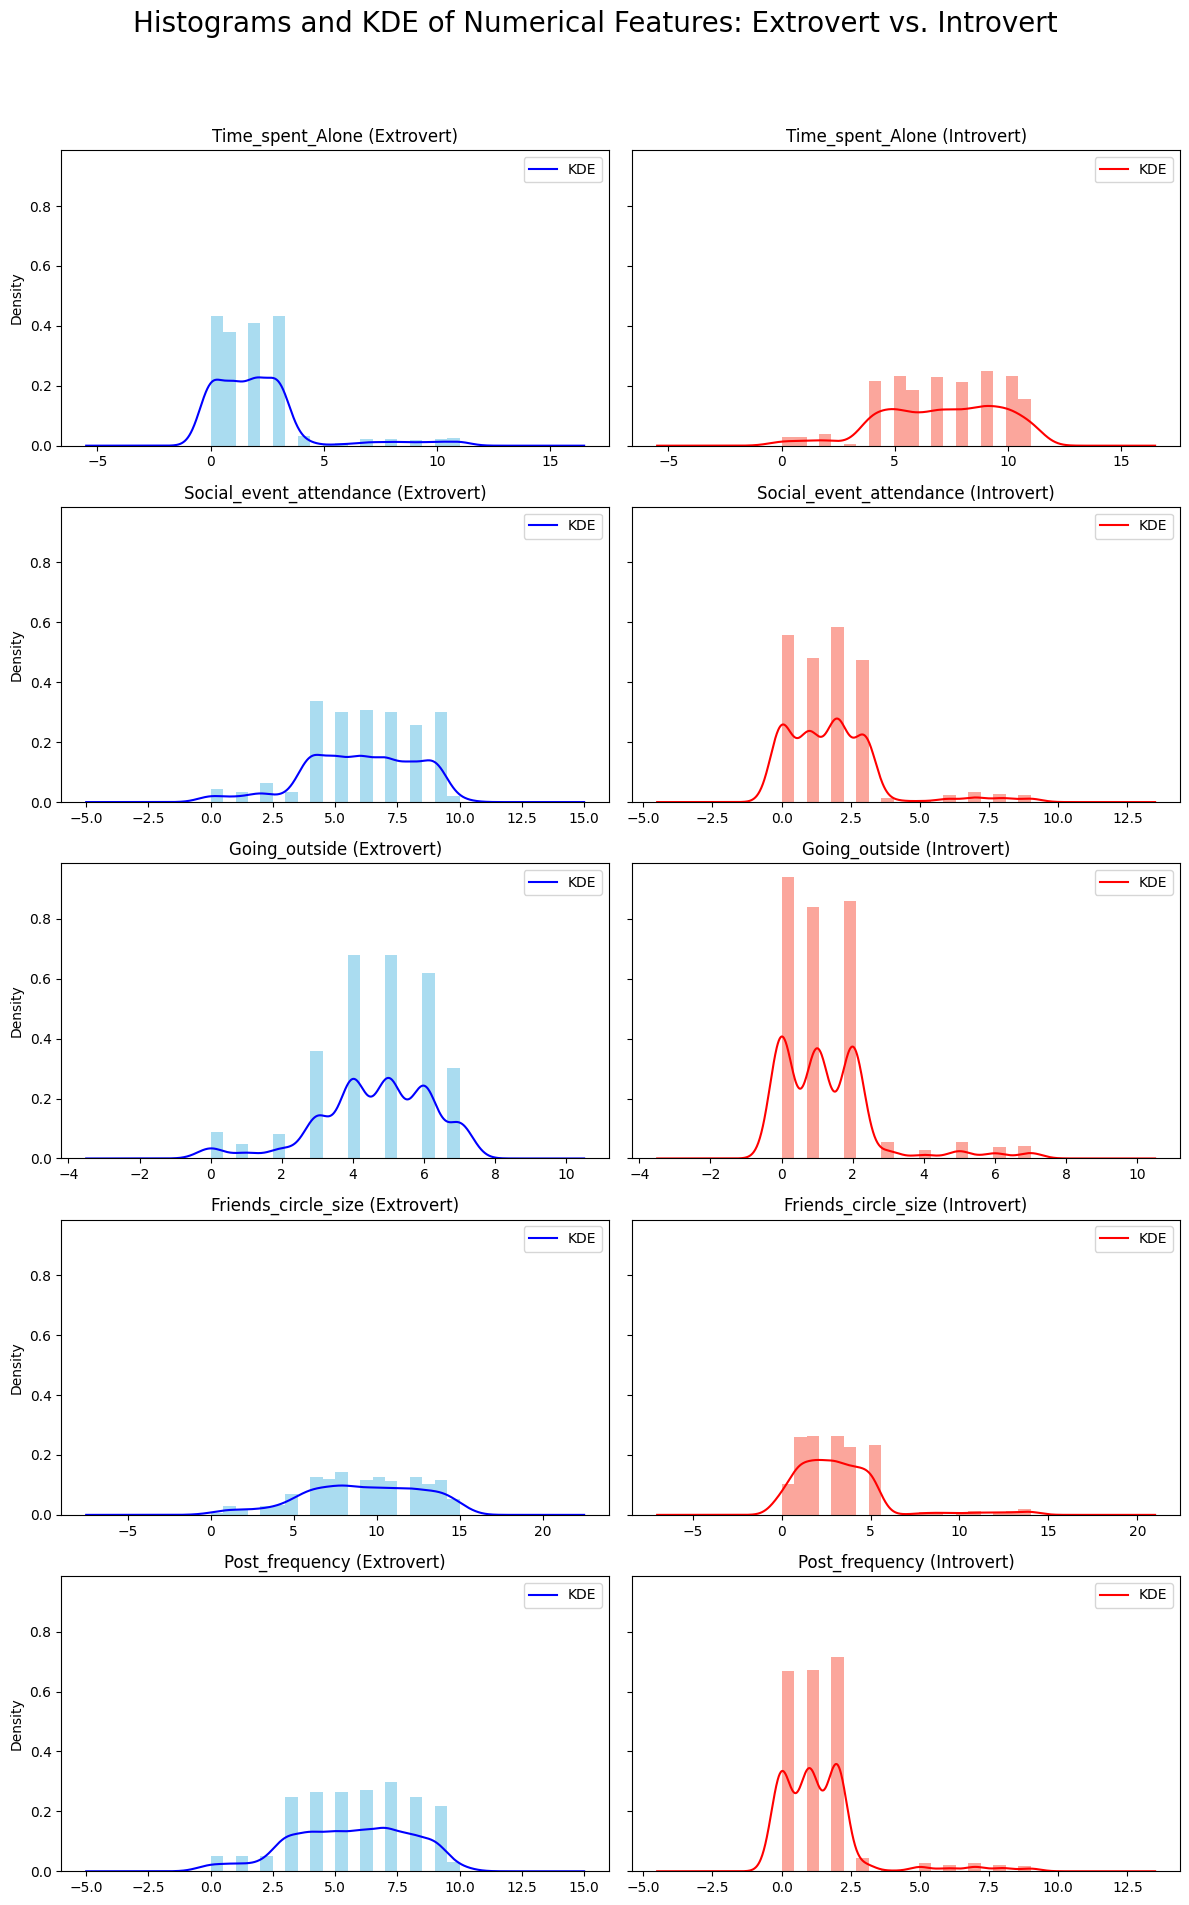

In [10]:
numeric_cols = dfe.select_dtypes(include=np.number).columns

# Create a figure and a grid of subplots. 5 rows, 2 columns.
# `sharey=True` makes the y-axis consistent for easier comparison.
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(12, 20), sharey=True)

# Add a main title to the entire figure
fig.suptitle('Histograms and KDE of Numerical Features: Extrovert vs. Introvert', fontsize=20)

# Iterate through each numeric column and the corresponding row of axes
for i, col in enumerate(numeric_cols):
    # --- Left Plot: Extrovert Dataframe (dfe) ---
    ax_left = axes[i, 0]
    # Plot histogram
    dfe[col].hist(bins=20, ax=ax_left, grid=False, density=True, color='skyblue', alpha=0.7)
    # Overlay KDE plot
    dfe[col].plot(kind='kde', ax=ax_left, color='blue', label='KDE')
    ax_left.set_title(f'{col} (Extrovert)')
    ax_left.set_ylabel('Density')
    ax_left.legend()


    # --- Right Plot: Introvert Dataframe (dfi) ---
    ax_right = axes[i, 1]
    # Plot histogram
    dfi[col].hist(bins=20, ax=ax_right, grid=False, density=True, color='salmon', alpha=0.7)
    # Overlay KDE plot
    dfi[col].plot(kind='kde', ax=ax_right, color='red', label='KDE')
    ax_right.set_title(f'{col} (Introvert)')
    ax_right.legend()

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

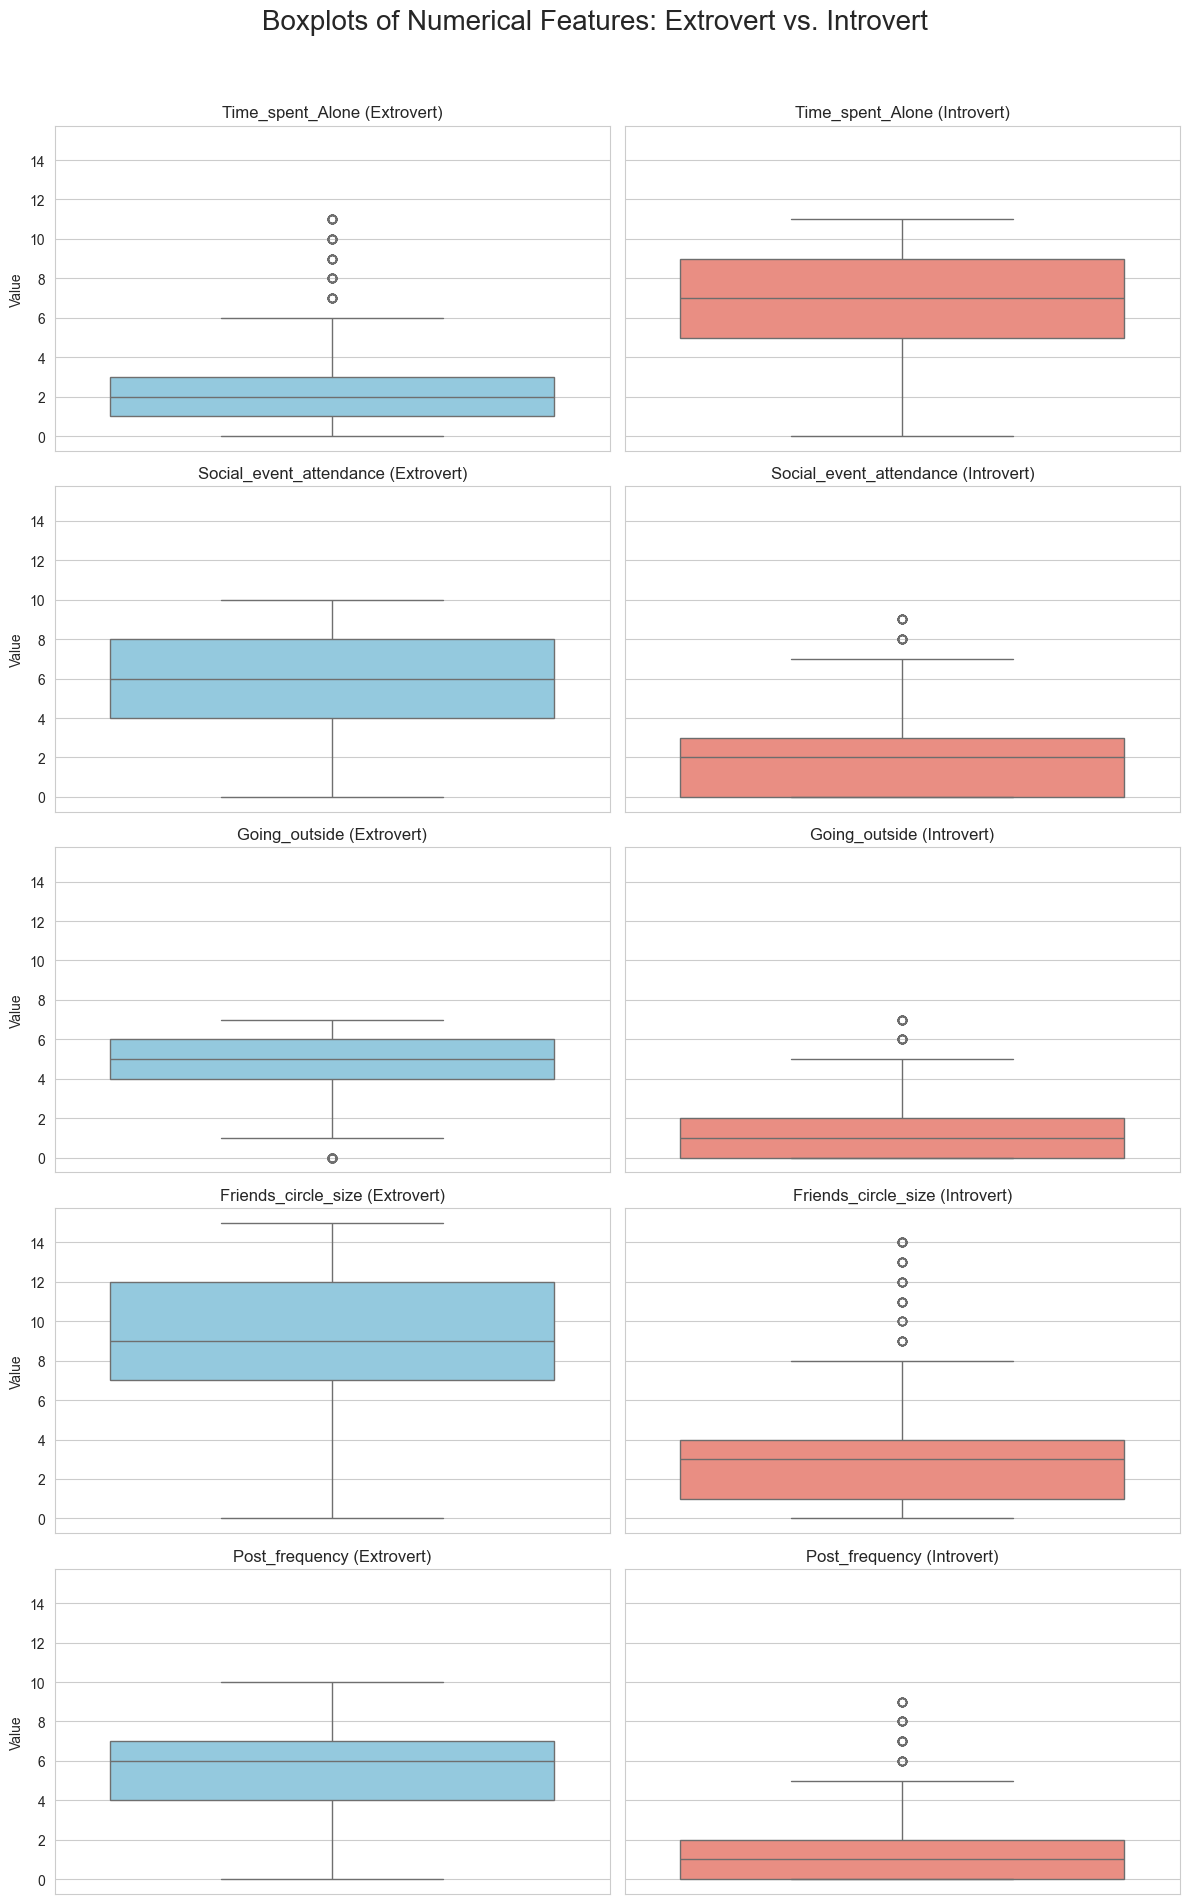

In [11]:
sns.set_style("whitegrid")


# Create a figure and a grid of subplots. 5 rows, 2 columns.
# `sharey=True` makes the y-axis consistent for easier comparison.
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=2, figsize=(12, 20), sharey=True)

# Add a main title to the entire figure
fig.suptitle('Boxplots of Numerical Features: Extrovert vs. Introvert', fontsize=20)

# Iterate through each numeric column and the corresponding row of axes
for i, col in enumerate(numeric_cols):
    # --- Left Plot: Extrovert Dataframe (dfe) ---
    ax_left = axes[i, 0]
    sns.boxplot(y=dfe[col], ax=ax_left, color='skyblue')
    ax_left.set_title(f'{col} (Extrovert)')
    ax_left.set_ylabel('Value') # Set a y-axis label

    # --- Right Plot: Introvert Dataframe (dfi) ---
    ax_right = axes[i, 1]
    sns.boxplot(y=dfi[col], ax=ax_right, color='salmon')
    ax_right.set_title(f'{col} (Introvert)')
    ax_right.set_ylabel('') # Hide y-label for the right plot for a cleaner look

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.96])

# Display the plots
plt.show()

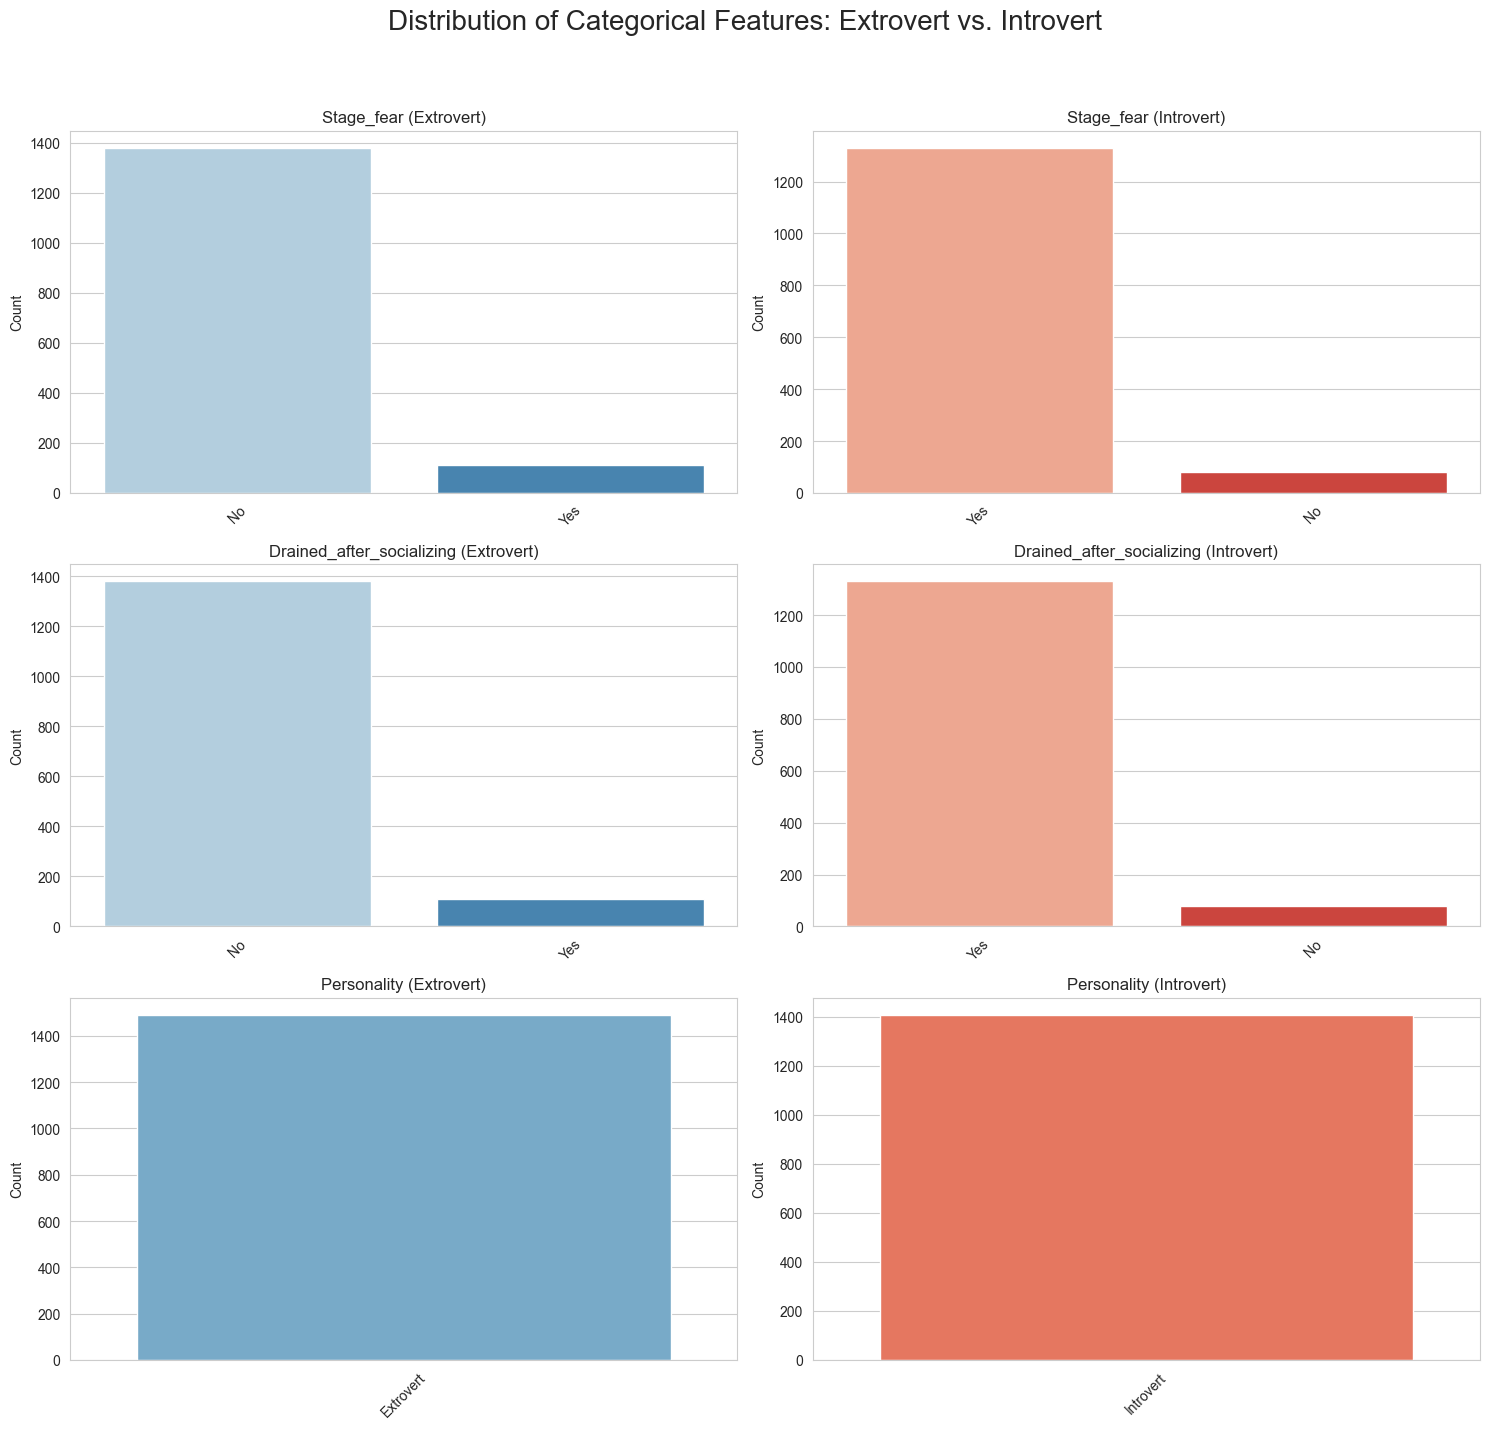

In [12]:
categorical_cols = dfe.select_dtypes(include=['object', 'category']).columns

# Create a figure and a grid of subplots.
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=2, figsize=(15, len(categorical_cols) * 5), squeeze=False)

# Add a main title to the entire figure
fig.suptitle('Distribution of Categorical Features: Extrovert vs. Introvert', fontsize=20)

# Loop through each categorical column and create a count plot
for i, col in enumerate(categorical_cols):
    # --- Left Plot: Extrovert Dataframe (dfe) ---
    ax_left = axes[i, 0]
    # Handle NaN values by filling with a placeholder
    series_extrovert = dfe[col].fillna('Missing')
    # Create plot order based on value counts
    order_extrovert = series_extrovert.value_counts().index
    # Assigning x to hue and setting legend=False to avoid FutureWarning
    sns.countplot(x=series_extrovert, ax=ax_left, hue=series_extrovert, palette="Blues", order=order_extrovert, legend=False)
    ax_left.set_title(f'{col} (Extrovert)')
    ax_left.set_xlabel('')
    ax_left.set_ylabel('Count')
    ax_left.tick_params(axis='x', rotation=45)

    # --- Right Plot: Introvert Dataframe (dfi) ---
    ax_right = axes[i, 1]
    # Handle NaN values by filling with a placeholder
    series_introvert = dfi[col].fillna('Missing')
    # Create plot order based on value counts
    order_introvert = series_introvert.value_counts().index
    # Assigning x to hue and setting legend=False to avoid FutureWarning
    sns.countplot(x=series_introvert, ax=ax_right, hue=series_introvert, palette="Reds", order=order_introvert, legend=False)
    ax_right.set_title(f'{col} (Introvert)')
    ax_right.set_xlabel('')
    ax_right.set_ylabel('Count')
    ax_right.tick_params(axis='x', rotation=45)

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

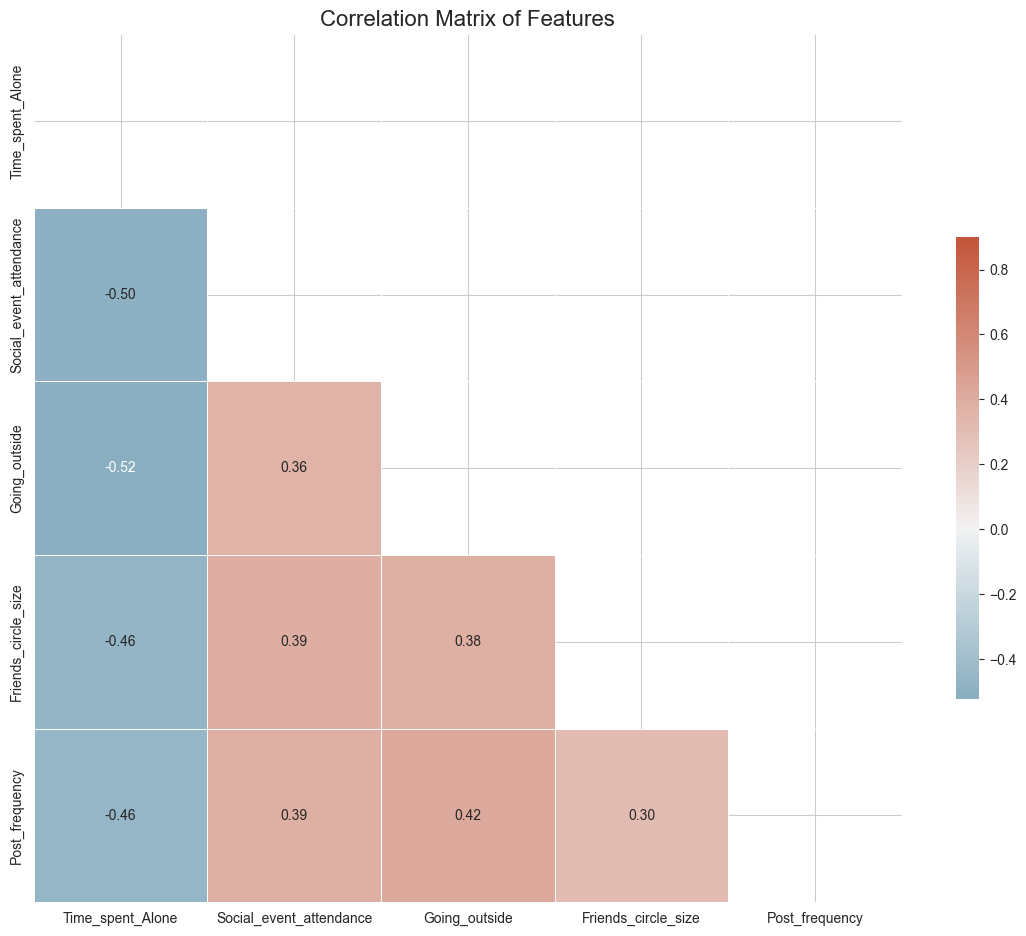

In [13]:
# Compute the correlation matrix for numerical features only
correlation_matrix = dfe.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True, fmt=".2f")

plt.title('Correlation Matrix of Features', size=16)
plt.show()

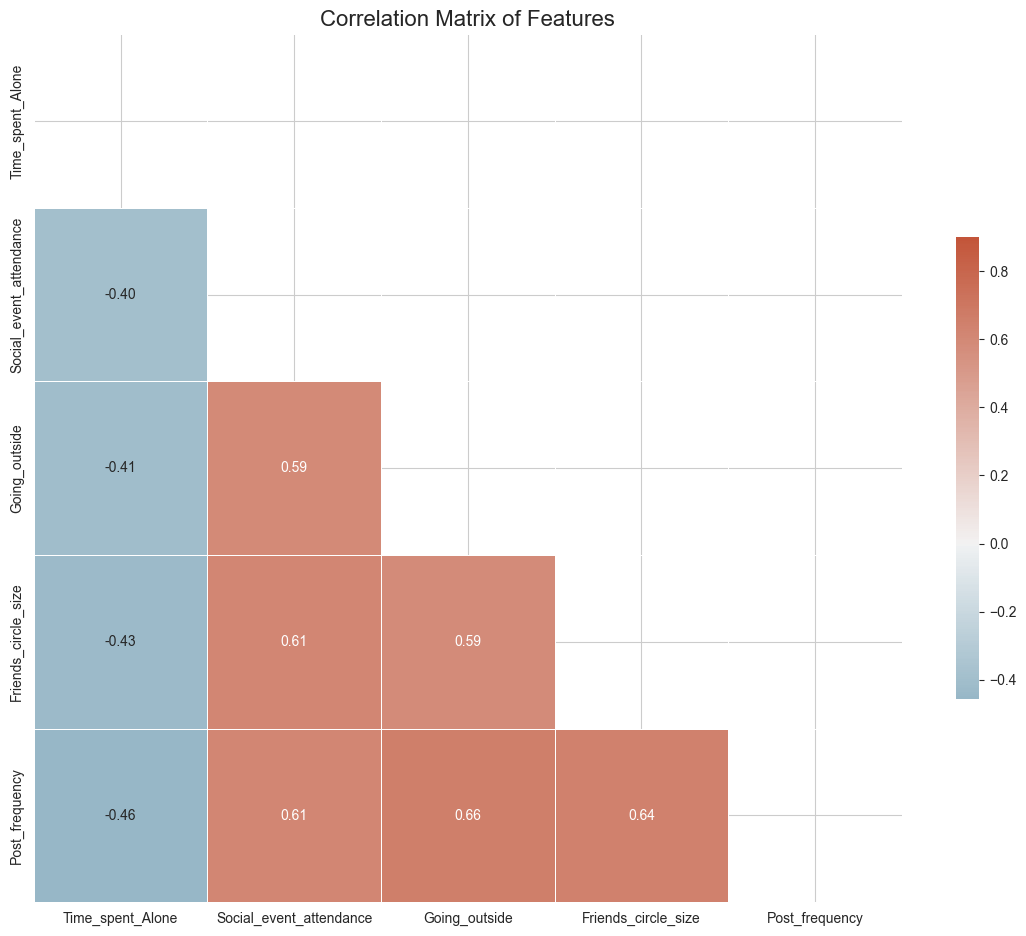

In [14]:
# Compute the correlation matrix for numerical features only
correlation_matrix = dfi.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True, fmt=".2f")

plt.title('Correlation Matrix of Features', size=16)
plt.show()

In [15]:
display(dfe.describe(include="all").T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Time_spent_Alone,1457.0,NaN,NaN,NaN,2.067261,2.208781,0.0,1.0,2.0,3.0,11.0
Stage_fear,1491,2,No,1380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Social_event_attendance,1463.0,NaN,NaN,NaN,6.016405,2.21171,0.0,4.0,6.0,8.0,10.0
Going_outside,1456.0,NaN,NaN,NaN,4.634615,1.593288,0.0,4.0,5.0,6.0,7.0
Drained_after_socializing,1491,2,No,1380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Friends_circle_size,1451.0,NaN,NaN,NaN,9.173673,3.501944,0.0,7.0,9.0,12.0,15.0
Post_frequency,1458.0,NaN,NaN,NaN,5.638546,2.341549,0.0,4.0,6.0,7.0,10.0
Personality,1491,1,Extrovert,1491,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
from sklearn.impute import SimpleImputer
# Encode target variable

from sklearn.preprocessing import LabelEncoder

# Handle missing values
# Numeric features: impute with median
numeric_imputer = SimpleImputer(strategy='median')
dfe[numeric_cols] = numeric_imputer.fit_transform(dfe[numeric_cols])
dfi[numeric_cols] = numeric_imputer.fit_transform(dfi[numeric_cols])


# Encode categorical features
# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [17]:
dfe.groupby(['Stage_fear','Drained_after_socializing']).count()


,,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality
Stage_fear,Drained_after_socializing,,,,,,
No,No,1380,1380,1380,1380,1380,1380
Yes,Yes,111,111,111,111,111,111


In [18]:
dfi = dfi.drop('Stage_fear', axis=1)
dfe = dfe.drop('Stage_fear', axis=1)


In [19]:
dfi.columns

Index(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency',
       'Personality'],
      dtype='object')

In [20]:
dfe = dfe.drop('Personality',axis=1)
dfi = dfi.drop('Personality',axis=1)

In [21]:
import umap
import plotly.express as px

In [22]:
import networkx as nx
import gower




In [23]:
reducer = umap.UMAP(metric='precomputed', n_neighbors=15, n_components=2, random_state=42)

In [24]:
D = gower.gower_matrix(dfe)

In [25]:
embedding = reducer.fit_transform(D)

C:\Users\basde\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
C:\Users\basde\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [26]:
embedding_df = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'])


In [27]:
distance_matrix_D.shape

NameError: name 'distance_matrix_D' is not defined

In [ ]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

# Let's assume 'dfe' is your preprocessed dataframe for extroverts
# Make sure categorical feature columns are identified correctly.
categorical_feature_indices = [dfe.columns.get_loc(col) for col in dfe.select_dtypes(include='object').columns]

# --- Step 1: Find the optimal number of clusters (k) using the Elbow Method ---
costs = []
K = range(2, 8) # Check for 2 to 7 clusters

for k in K:
    print(f"Calculating for k={k}...")
    kp = KPrototypes(n_clusters=k, init='Huang', n_init=10, random_state=42)
    clusters = kp.fit_predict(dfe, categorical=categorical_feature_indices)
    costs.append(kp.cost_)

# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(K, costs, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()



In [ ]:
# --- Step 2: Run K-Prototypes with the optimal k ---
# Look at the plot above. The "elbow" is the point where the cost stops
# decreasing sharply. Let's say we choose k=4 based on the plot.
optimal_k = 5
kp = KPrototypes(n_clusters=optimal_k, init='Huang', n_init=10, random_state=42)
final_clusters = kp.fit_predict(dfe, categorical=categorical_feature_indices)

# Add the cluster labels back to your original dataframe
dfe['subgroup'] = final_clusters

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Let's assume 'dfe' is your dataframe with the 'subgroup' column already added.

# 1. Get a list of all numerical column names
numeric_cols = dfe.select_dtypes(include=np.number).columns.tolist()

# 2. Remove the 'subgroup' column itself, as we don't want to plot it
if 'subgroup' in numeric_cols:
    numeric_cols.remove('subgroup')

# 3. Loop through each numerical column and create a boxplot
for col in numeric_cols:
    plt.figure(figsize=(8, 5)) # Create a new figure for each plot
    sns.boxplot(x='subgroup', y=col, data=dfe)
    plt.title(f'Distribution of {col} Across Subgroups')
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Let's assume 'dfe' is your dataframe and 'numeric_cols' is your list of numerical columns.

# --- Step 1: Prepare the data ---

# Calculate the mean of each numerical feature for each subgroup
radar_data = dfe.groupby('subgroup')[numeric_cols].mean()

# Scale the data so all features are on the same scale (0 to 1)
scaler = MinMaxScaler()
radar_data_scaled = pd.DataFrame(scaler.fit_transform(radar_data), columns=radar_data.columns, index=radar_data.index)

# Add the first column to the end to close the loop in the plot
labels = radar_data_scaled.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] # Complete the loop

# --- Step 2: Create the Radar Chart ---

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Loop through each subgroup and plot its profile
for i, row in radar_data_scaled.iterrows():
    values = row.tolist()
    values += values[:1] # Complete the loop
    ax.plot(angles, values, label=f'Subgroup {i}', linewidth=2)
    ax.fill(angles, values, alpha=0.2)

# --- Step 3: Format the plot ---
ax.set_yticklabels([]) # Hide radial ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Radar Chart of Subgroup Profiles', size=20, color='black', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

In [ ]:
# Let's assume 'dfi' is your preprocessed dataframe for extroverts
# Make sure categorical feature columns are identified correctly.
categorical_feature_indices = [dfi.columns.get_loc(col) for col in dfi.select_dtypes(include='object').columns]

# --- Step 1: Find the optimal number of clusters (k) using the Elbow Method ---
costs = []
K = range(2, 8) # Check for 2 to 7 clusters

for k in K:
    print(f"Calculating for k={k}...")
    kp = KPrototypes(n_clusters=k, init='Huang', n_init=10, random_state=42)
    clusters = kp.fit_predict(dfi, categorical=categorical_feature_indices)
    costs.append(kp.cost_)

# Plot the elbow
plt.figure(figsize=(8, 5))
plt.plot(K, costs, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()



In [ ]:
# --- Step 2: Run K-Prototypes with the optimal k ---
# Look at the plot above. The "elbow" is the point where the cost stops
# decreasing sharply. Let's say we choose k=4 based on the plot.
optimal_k = 5
kp = KPrototypes(n_clusters=optimal_k, init='Huang', n_init=10, random_state=42)
final_clusters = kp.fit_predict(dfi, categorical=categorical_feature_indices)

# Add the cluster labels back to your original dataframe
dfi['subgroup'] = final_clusters

In [ ]:
# 1. Get a list of all numerical column names
numeric_cols = dfi.select_dtypes(include=np.number).columns.tolist()

# 2. Remove the 'subgroup' column itself, as we don't want to plot it
if 'subgroup' in numeric_cols:
    numeric_cols.remove('subgroup')

# 3. Loop through each numerical column and create a boxplot
for col in numeric_cols:
    plt.figure(figsize=(8, 5)) # Create a new figure for each plot
    sns.boxplot(x='subgroup', y=col, data=dfi)
    plt.title(f'Distribution of {col} Across Subgroups')
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Let's assume 'dfi' is your dataframe and 'numeric_cols' is your list of numerical columns.

# --- Step 1: Prepare the data ---

# Calculate the mean of each numerical feature for each subgroup
radar_data = dfi.groupby('subgroup')[numeric_cols].mean()

# Define the desired order of features for the plot
# Place 'Time_spent_Alone' and 'Friends_circle_size' next to each other
desired_order = [
    'Time_spent_Alone',
    'Friends_circle_size',
    'Social_event_attendance',
    'Going_outside',
    'Post_frequency'
]
# Reorder the columns of our data
radar_data = radar_data[desired_order]


# Scale the data so all features are on the same scale (0 to 1)
scaler = MinMaxScaler()
radar_data_scaled = pd.DataFrame(scaler.fit_transform(radar_data), columns=radar_data.columns, index=radar_data.index)

# Get the labels and angles for the plot based on the new order
labels = radar_data_scaled.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] # Complete the loop

# --- Step 2: Create the Radar Chart ---

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Loop through each subgroup and plot its profile
for i, row in radar_data_scaled.iterrows():
    values = row.tolist()
    values += values[:1] # Complete the loop
    ax.plot(angles, values, label=f'Subgroup {i}', linewidth=2)
    ax.fill(angles, values, alpha=0.2)

# --- Step 3: Format the plot ---
ax.set_yticklabels([]) # Hide radial ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Radar Chart of Subgroup Profiles', size=20, color='black', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

todo: change wrongly placed extroverts and introverts with the other.
remove categorical variables, because the ml model might place to much weight here. look into methods that dont have this issue.
use cv to check performance
check playground data

In [ ]:
import networkx as nx

import gower

In [ ]:
dfe = dfe.drop('Personality',axis=1)

dfi = dfe.drop('Personality',axis=1)

In [29]:
def calculate_triangle_area(d_ij, d_jk, d_ki):
    """
    Calculates the area of a triangle using Heron's formula from its side lengths.

    Args:
        d_ij (float): The distance between point i and point j.
        d_jk (float): The distance between point j and point k.
        d_ki (float): The distance between point k and point i.

    Returns:
        float: The area of the triangle.
    """
    # Calculate the semi-perimeter of the triangle
    s = (d_ij + d_jk + d_ki) / 2.0
    
    # Use max(0, ...) to prevent math errors from floating point inaccuracies
    area_squared = s * max(0, s - d_ij) * max(0, s - d_jk) * max(0, s - d_ki)
    
    return np.sqrt(area_squared)

def is_triangle_flat(p1_idx, p2_idx, p3_idx, D, epsilon):
    """
    Checks if a triangle defined by three points is "flat" by checking if its 
    smallest height is less than a threshold (epsilon).

    Args:
        p1_idx (int): The index of the first point.
        p2_idx (int): The index of the second point.
        p3_idx (int): The index of the third point.
        D (np.ndarray): The MxM pairwise distance matrix.
        epsilon (float): The flatness threshold.

    Returns:
        bool: True if the triangle is flat, False otherwise.
    """
    # Get the lengths of the triangle's sides from the distance matrix
    distances = [D[p1_idx, p2_idx], D[p2_idx, p3_idx], D[p3_idx, p1_idx]]
    
    # A triangle with a side of zero length is degenerate and thus perfectly flat
    if any(d == 0 for d in distances):
        return True

    # Find the longest side of the triangle
    delta = max(distances)
    
    # Calculate the area of the triangle
    area = calculate_triangle_area(distances[0], distances[1], distances[2])
    
    # The smallest height of the triangle is calculated as 2 * Area / longest_side
    mu = 2 * area / delta
    
    # The triangle is flat if its smallest height is less than or equal to epsilon
    return mu <= epsilon

def is_quadrangle_flat(p_idx, q_idx, r_idx, s_idx, D, epsilon):
    """
    Checks if a quadrangle is "flat" by verifying that all four of its 
    constituent triangles are also flat.

    Args:
        p_idx (int): The index of the first point.
        q_idx (int): The index of the second point.
        r_idx (int): The index of the third point.
        s_idx (int): The index of the fourth point.
        D (np.ndarray): The MxM pairwise distance matrix.
        epsilon (float): The flatness threshold.

    Returns:
        bool: True if the quadrangle is flat, False otherwise.
    """
    # A quadrangle is flat if and only if all four triangles inside it are flat.
    # Check each of the four possible triangles.
    if not is_triangle_flat(p_idx, q_idx, r_idx, D, epsilon):
        return False
    if not is_triangle_flat(p_idx, q_idx, s_idx, D, epsilon):
        return False
    if not is_triangle_flat(p_idx, r_idx, s_idx, D, epsilon):
        return False
    if not is_triangle_flat(q_idx, r_idx, s_idx, D, epsilon):
        return False
        
    # If all four triangles passed the test, the quadrangle is flat.
    return True

In [ ]:
import itertools
# The flatness threshold. Since Gower's distance is on a [0, 1] scale,
# this value must be very small. This is the main parameter to tune.
epsilon = 0.1
# Set to False to speed up computation significantly
check_quadrangles = False 

# --- Calculate Gower's Distance Matrix ---
# This correctly handles the mixed numerical and categorical data.
print("Calculating Gower's distance matrix...")

m = len(dfe)
# --- Initialize the Auxiliary Graph ---
print("Initializing the auxiliary graph...")
G = nx.Graph()
# The nodes of the graph are all the unique pairs of points from the dataset.
nodes = list(itertools.combinations(range(m), 2))
G.add_nodes_from(nodes)

# --- Build Graph from Triangles ---
print("Building graph based on triangle flatness (this may take a while)...")
for i, j, k in itertools.combinations(range(m), 3):
    if is_triangle_flat(i, j, k, D, epsilon):
        # If the triangle is flat, connect the corresponding nodes in the graph
        G.add_edge((min(i,j), max(i,j)), (min(j,k), max(j,k)))
        G.add_edge((min(j,k), max(j,k)), (min(k,i), max(k,i)))
        G.add_edge((min(k,i), max(k,i)), (min(i,j), max(i,j)))

# --- (Optional) Build Graph from Quadrangles ---
if check_quadrangles:
    print("Building graph based on quadrangle flatness (this is very slow)...")
    for p, q, r, s in itertools.combinations(range(m), 4):
        if is_quadrangle_flat(p, q, r, s, D, epsilon):
            G.add_edge(tuple(sorted((p,q))), tuple(sorted((r,s))))
            G.add_edge(tuple(sorted((p,r))), tuple(sorted((q,s))))
            G.add_edge(tuple(sorted((p,s))), tuple(sorted((q,r))))

# --- Find and Report the Largest Clique ---
print("Finding the largest clique...")
# nx.find_cliques finds all maximal cliques. We then find the largest one.
all_cliques = list(nx.find_cliques(G))

if not all_cliques:
    print("\nNo cliques found. Try increasing the epsilon threshold.")
else:
    largest_clique_nodes = max(all_cliques, key=len)
    
    # Extract the unique point indices from the nodes of the clique
    object_indices = set()
    for node_pair in largest_clique_nodes:
        object_indices.add(node_pair[0])
        object_indices.add(node_pair[1])
    
    print("\n--- RESULTS ---")
    print(f"Identified a linear subgroup composed of {len(object_indices)} points.")
    print("The indices of these points are:")
    print(sorted(list(object_indices)))
    
    # Display the identified subgroup from the original DataFrame
    print("\nThe data points in this subgroup are:")
    print(dfe.iloc[sorted(list(object_indices))])

Calculating Gower's distance matrix...
Initializing the auxiliary graph...
Building graph based on triangle flatness (this may take a while)...


In [2]:
dfi

NameError: name 'dfi' is not defined